# Training, Validation, and Testing Framework
AirBnB Price Prediction 

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
import xgboost as xgb

from sklearn.decomposition import PCA

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

### Reading in the Dataset

In [373]:
#read in raw data from .csv file
filename = "../6-Experimental Data - cont_cat_text.csv"
data_raw = np.genfromtxt(filename, delimiter=',', skip_header=1)
feature_names = np.genfromtxt(filename, delimiter=',', names=True).dtype.names

feature_names = feature_names[1:] #remove log price
num_features = data_raw.shape[1] -1

print("Raw data shape:", data_raw.shape)
print("Number of Features:", num_features)


#split raw data into X and Y
X, y = data_raw[:,1:], data_raw[:,0:1]
y = np.ravel(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("\nFeatures")
for f in feature_names:
    print(f,end="\n")


Raw data shape: (24451, 57)
Number of Features: 56
X_train shape: (19560, 56)
X_test shape: (4891, 56)

Features
host_listings_count
accommodates
bathrooms
bedrooms
beds
security_deposit
cleaning_fee
guests_included
maximum_minimum_nights
review_scores_rating
review_scores_location
latitude
longitude
number_of_reviews
number_of_reviews_ltm
calculated_host_listings_count_private_rooms
calculated_host_listings_count_shared_rooms
reviews_per_month
neighbourhood_cleansed
zipcode
property_type
entire
luxury_moderate
luxury_super_strict_95
strict_14_with_grace_period
super_strict_30
super_strict_60
amenity_scores
private
shared
flexible
moderate
summary_SVD1
summary_SVD2
summary_SVD3
space_SVD1
space_SVD2
space_SVD3
description_SVD1
description_SVD2
description_SVD3
neighborhood_overview_SVD1
neighborhood_overview_SVD2
neighborhood_overview_SVD3
access_SVD1
access_SVD2
access_SVD3
interaction_SVD1
interaction_SVD2
interaction_SVD3
house_rules_SVD1
house_rules_SVD2
house_rules_SVD3
host_about

### Hyperparameter Search and Tuning

In [374]:
#model = Lasso(random_state=0, max_iter=10000) #,normalize=True
model = Ridge(random_state=0, max_iter=10000) #,normalize=True
#model = RandomForestRegressor(random_state=0)
#model = DecisionTreeRegressor()
#model = make_pipeline(StandardScaler(), svm.SVR())
#model = make_pipeline(StandardScaler(),PCA(n_components=11), SGDRegressor(average=True))
#model = make_pipeline(StandardScaler(), MLPRegressor(random_state=0, max_iter=500, solver='sgd'))
#model = GradientBoostingRegressor(n_estimators=800, random_state=0, loss='ls')
#model = make_pipeline(StandardScaler(),KNeighborsRegressor())
#model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=100, tol=None, average=True, random_state=0))
#model = make_pipeline(StandardScaler(),MLPRegressor(random_state=0, max_iter=500, solver='sgd',batch_size=100))


#======================= LASSO =======================#
#alphas = np.logspace(-4, -0.5, 30) # Lasso
#tuned_parameters = [{'alpha': alphas}]

#======================= RIDGE =======================#

alphas = np.logspace(-2, 3, 60) # Ridge
tuned_parameters = [{'alpha': alphas}]

#=================== RANDOM FOREST ===================#

#n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)] # Number of trees in random forest
#max_features = ['auto', 'sqrt'] # Number of features to consider at every split
#max_depth = [int(x) for x in np.linspace(100, 200, num = 4)] # Maximum number of levels in tree
#max_depth.append(None) # Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10] # Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4] # Method of selecting samples for training each tree
#bootstrap = [True, False] # Create the random grid
#tuned_parameters = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap
#                }


#======================= SGD ========================#
#alphas = np.logspace(-1, 1, 20)
#alphas = np.linspace(0.1, 1, 30)
#tuned_parameters = [{'sgdregressor__alpha': alphas}]
#print(model.steps[1])

#======================= MLP ========================#
#hidden_layer_sizes=[(10), (50), (100), (200)]
#activation = ["tanh", "relu"]
#tuned_parameters = [{'mlpregressor__hidden_layer_sizes': hidden_layer_sizes}]
#tuned_parameters = [{'mlpregressor__activation': activation}]
#print(model.steps[1])


#======================= SVR ========================#

#kernel = ['linear', 'poly', 'rbf','sigmoid']
#C = [float(x) for x in np.linspace(0.2, 5, num = 5)]
#tuned_parameters = {'svr__C': C}


#================== DECISION TREE ===================#

#criterion = ['mse', 'friedman_mse', 'mae'] 
#max_depths = [int(x) for x in np.linspace(2, 12, num = 10)]
#min_samples_split = [2, 5, 10, 20] # Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4, 8] # Method of selecting samples for training each tree
#tuned_parameters = [{'criterion': criterion,
#                     'max_depth': max_depths,
#                     'min_samples_split': min_samples_split,
#                     'min_samples_leaf': min_samples_leaf
#                    }]


#================== GRADIENT BOOST ===================#

#n_estimators = [int(x) for x in np.linspace(100, 1000, num = 5)] 
#learning_rate =  np.logspace(-2, 0, 10) #np.linspace(0.01, 0.4, num = 5)
#max_depth = [1,2,4]
#tuned_parameters = [{#'n_estimators': n_estimators,
#                     'learning_rate': learning_rate,
                     #'max_depth': max_depth
#                    }]

#======================= kNN ========================#

#n_neighbors = [int(x) for x in np.linspace(4, 20, num = 5)] 
#tuned_parameters = [{'kneighborsregressor__n_neighbors': n_neighbors,
#                    }]

#===================== SCORING ======================#
#scoring options: R^2="r2", MSE="neg_mean_squared_error"

clf = GridSearchCV(model, tuned_parameters, cv=5, refit=False, n_jobs = -1, verbose=1, scoring='r2')
#clf = RandomizedSearchCV(model, tuned_parameters, n_iter = 3, cv = 5, random_state=0, n_jobs = -1, verbose=1, scoring='r2')

clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Best parameters set found on development set:")
print(clf.best_params_)
print("Best Score:",np.max(scores))



Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:    8.8s


Best parameters set found on development set:
{'alpha': 1.597312280060254}
Best Score: 0.6442652400418963


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   10.0s finished


(0.01, 1000.0)

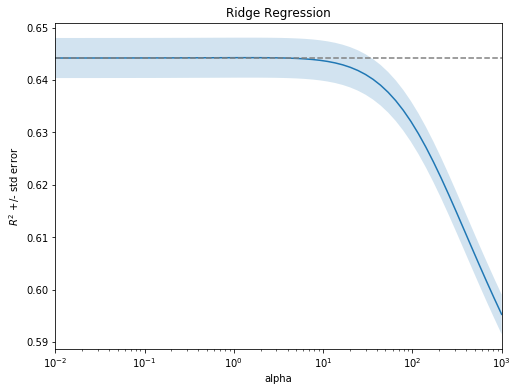

In [375]:
hyperparam = alphas

# Graph Cross-validation scores
plt.figure().set_size_inches(8, 6)
plt.semilogx(hyperparam, scores)
#plt.plot(hyperparam, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(len(hyperparam))

#plt.semilogx(hyperparam, scores + std_error, 'b--')
#plt.semilogx(hyperparam, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(hyperparam, scores + std_error, scores - std_error, alpha=0.2)

plt.title("Ridge Regression")
plt.ylabel('$R^2$ +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([hyperparam[0], hyperparam[-1]])
#plt.ylim(0.40,0.7)


### Training curves

In [254]:
estimator1 =  Ridge(alpha=1.168951, random_state=0, max_iter=10000)
estimator2 =  make_pipeline(StandardScaler(),MLPRegressor(random_state=0, max_iter=500, solver='sgd',batch_size=100))
estimator3 =  xgb.XGBRegressor(n_estimators=800, random_state=0,max_depth=5)

title = "" 
axes=None 
ylim=None 
cv=None
n_jobs=-1 
train_sizes=np.linspace(.15, 1.0, 5)

train_sizes1, train_scores1, test_scores1 = learning_curve(estimator1, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='r2')
train_sizes2, train_scores2, test_scores2 = learning_curve(estimator2, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='r2')
train_sizes3, train_scores3, test_scores3 = learning_curve(estimator3, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring='r2')

train_scores_mean1 = np.mean(train_scores1, axis=1)
train_scores_std1 = np.std(train_scores1, axis=1)
test_scores_mean1 = np.mean(test_scores1, axis=1)
test_scores_std1 = np.std(test_scores1, axis=1)

train_scores_mean2 = np.mean(train_scores2, axis=1)
train_scores_std2 = np.std(train_scores2, axis=1)
test_scores_mean2 = np.mean(test_scores2, axis=1)
test_scores_std2 = np.std(test_scores2, axis=1)

train_scores_mean3 = np.mean(train_scores3, axis=1)
train_scores_std3 = np.std(train_scores3, axis=1)
test_scores_mean3 = np.mean(test_scores3, axis=1)
test_scores_std3 = np.std(test_scores3, axis=1)


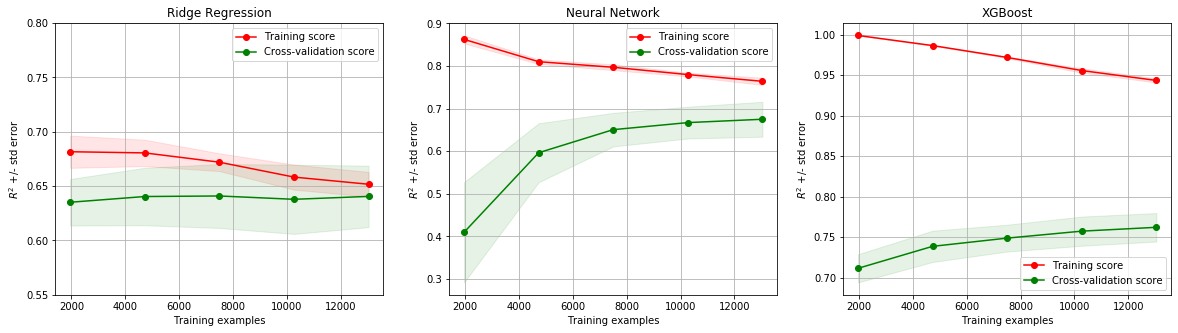

In [257]:
_, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].set_title("Ridge Regression")
if ylim is not None:
    axes[0].set_ylim(*ylim)
axes[0].set_xlabel("Training examples")
axes[0].set_ylabel("$R^2$ +/- std error")
axes[0].set_ylim(0.55,0.80)
# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes1, train_scores_mean1 - train_scores_std1,
                     train_scores_mean1 + train_scores_std1, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes1, test_scores_mean1 - test_scores_std1,
                     test_scores_mean1 + test_scores_std1, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes1, train_scores_mean1, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes1, test_scores_mean1, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")



axes[1].set_title("Neural Network")
if ylim is not None:
    axes[0].set_ylim(*ylim)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("$R^2$ +/- std error")
#axes[1].set_ylim(0.6,0.80)
# Plot learning curve
axes[1].grid()
axes[1].fill_between(train_sizes2, train_scores_mean2 - train_scores_std2,
                     train_scores_mean2 + train_scores_std2, alpha=0.1,
                     color="r")
axes[1].fill_between(train_sizes2, test_scores_mean2 - test_scores_std2,
                     test_scores_mean2 + test_scores_std2, alpha=0.1,
                     color="g")
axes[1].plot(train_sizes2, train_scores_mean2, 'o-', color="r",
             label="Training score")
axes[1].plot(train_sizes2, test_scores_mean2, 'o-', color="g",
             label="Cross-validation score")
axes[1].legend(loc="best")


axes[2].set_title("XGBoost")
if ylim is not None:
    axes[2].set_ylim(*ylim)
axes[2].set_xlabel("Training examples")
axes[2].set_ylabel("$R^2$ +/- std error")
#axes[2].set_ylim(0.6,0.80)
# Plot learning curve
axes[2].grid()
axes[2].fill_between(train_sizes3, train_scores_mean3 - train_scores_std3,
                     train_scores_mean3 + train_scores_std3, alpha=0.1,
                     color="r")
axes[2].fill_between(train_sizes3, test_scores_mean3 - test_scores_std3,
                     test_scores_mean3 + test_scores_std3, alpha=0.1,
                     color="g")
axes[2].plot(train_sizes3, train_scores_mean3, 'o-', color="r",
             label="Training score")
axes[2].plot(train_sizes3, test_scores_mean3, 'o-', color="g",
             label="Cross-validation score")
axes[2].legend(loc="best")



plt.show()

### Model Selection 

In [360]:
models = {
    'Linear':linear_model.LinearRegression(),
    'Lasso':Lasso(alpha=0.0001, random_state=0, max_iter=10000),
    'Ridge':Ridge(alpha=1.168951, random_state=0, max_iter=10000),
    'BayesianRidge':linear_model.BayesianRidge(),
    'RandForrest':RandomForestRegressor(random_state=0, n_estimators=200, min_samples_split=5,min_samples_leaf=2, max_features='sqrt', max_depth=40, bootstrap=False), #RandomForestRegressor(random_state=0, n_estimators=100, min_samples_split=5,min_samples_leaf=2, max_features='sqrt', max_depth=40, bootstrap=True)
    'SVR':make_pipeline(StandardScaler(), svm.SVR(C=1)),
    'SGD':make_pipeline(StandardScaler(),SGDRegressor(max_iter=100, tol=None, average=True, random_state=0, alpha=0.65)),
    'MLP(NN)':make_pipeline(StandardScaler(),MLPRegressor(random_state=0, max_iter=500, solver='sgd',batch_size=100)),
    'DecisionTree':DecisionTreeRegressor(random_state=0, max_depth=8,min_samples_leaf=8,min_samples_split=20),
    'AdaBoost':AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), random_state=0, learning_rate=0.1, n_estimators=400),
    'GradBoosting':GradientBoostingRegressor(n_estimators=250, learning_rate=0.1291549, random_state=0,max_depth=4,min_samples_split=100,min_samples_leaf=10), #GradientBoostingRegressor(n_estimators=800, learning_rate=0.1291549, random_state=0, loss='ls')
    'KNeighbors':make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=12)),
    'XGBoost': xgb.XGBRegressor(n_estimators=800, random_state=0,max_depth=5),
}

models = {
    'Linear':linear_model.LinearRegression(),
    'Ridge':Ridge(alpha=1.168951, random_state=0, max_iter=10000),
    'SGD':make_pipeline(StandardScaler(),SGDRegressor(max_iter=100, tol=None, average=True, random_state=0,alpha=0.65)),
    'MLP(NN)':make_pipeline(StandardScaler(),MLPRegressor(random_state=0, max_iter=500, solver='sgd',batch_size=100)),
    'SVR':make_pipeline(StandardScaler(), svm.SVR(C=1)),
    'RandForrest':RandomForestRegressor(random_state=0, n_estimators=200, min_samples_split=5,min_samples_leaf=2, max_features='sqrt', max_depth=40, bootstrap=False), #RandomForestRegressor(random_state=0, n_estimators=100, min_samples_split=5,min_samples_leaf=2, max_features='sqrt', max_depth=40, bootstrap=True)
    'GradBoost':GradientBoostingRegressor(n_estimators=250, learning_rate=0.1291549, random_state=0,max_depth=4,min_samples_split=100,min_samples_leaf=10), #GradientBoostingRegressor(n_estimators=800, learning_rate=0.1291549, random_state=0, loss='ls')
    'XGBoost': xgb.XGBRegressor(n_estimators=800, random_state=0,max_depth=5),
}


### Model Cross Validation

In [312]:
def getCVScores(regressors, X_train, y_train, cv=5):
    score_dict = {}
    #poly = PolynomialFeatures(degree=25, include_bias=False) 
    
    for name, regressor in regressors.items():
        cv_scores = cross_validate(regressor, X_train, y_train, cv=cv, scoring="r2", n_jobs=-1, verbose=1)
        score_dict[name] = cv_scores['test_score']
        
    return score_dict


score_dict_5 = getCVScores(models, X_train, y_train, cv=5)
#score_dict_10 = getCVScores(models, X_train, y_train, cv=10)

r2_scores_5 = list(score_dict_5.values())
#r2_scores_10 = list(score_dict_10.values())

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   50.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished


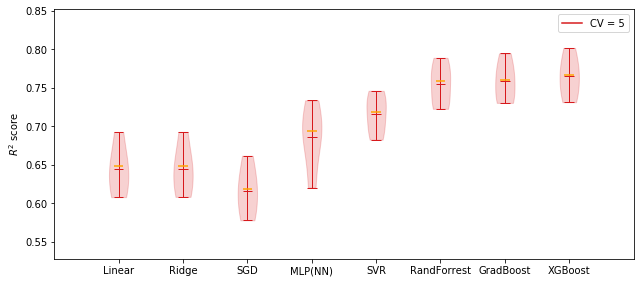

In [369]:
c1 = '#D7191C'
c2 = '#2C7BB6'
median_c = 'orange'

fig = plt.figure(figsize=(9, 4))

vp1 = plt.violinplot(
    r2_scores_5, 
    #positions=np.array(range(len(r2_scores_5)))*2.0-0.4, 
    positions=np.array(range(len(r2_scores_5)))*2.0, 
    widths=0.6,
    showmeans=True,
    showmedians=True,
    showextrema=True
)

plt.plot([], c=c1, label='CV = 5')
#plt.plot([], c=c2, label='CV = 10')
plt.legend()
plt.ylabel('$R^2$ score')

ticks = list(models.keys())
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.tight_layout()
        
ymin = np.min(r2_scores_5)

def set_colour(plot, colour):
    for pc in plot['bodies']:
        pc.set_facecolor(colour)
        pc.set_edgecolor(colour)
        pc.set_alpha(0.2)
    for partname in ('cbars','cmins','cmaxes','cmeans'):
        vp = plot[partname]
        vp.set_edgecolor(colour)
        vp.set_linewidth(1)
    plot['cmedians'].set_edgecolor('orange')


set_colour(vp1, c1)
#set_colour(vp2, c2)
    
plt.ylim(np.min(r2_scores_5)-0.05, np.max(r2_scores_5)+0.05)
plt.show()

### Model Evaluation

In [345]:
for key in models:
    m = models[key]
    
    start_time = time()
    m.fit(X_train, y_train)
    runtime = time() - start_time
    
    y_hat_train = m.predict(X_train)
    y_hat_test = m.predict(X_test)
    
    MSE_train = mean_squared_error(y_train, y_hat_train)
    R2_train = r2_score(y_train, y_hat_train)
    
    MSE_test = mean_squared_error(y_test, y_hat_test)
    R2_test = r2_score(y_test, y_hat_test)

    print("{:<18} - (Train R^2: {:.4f}  MSE: {:.4f})  (Test R^2: {:.4f}  MSE: {:.4f})  (Time: {:.4f}s)".format(key,R2_train, MSE_train,R2_test, MSE_test,runtime))
    

Linear             - (Train R^2: 0.6657  MSE: 0.2954)  (Test R^2: 0.6557  MSE: 0.2994)  (Time: 0.0858s)
Ridge              - (Train R^2: 0.6657  MSE: 0.2954)  (Test R^2: 0.6555  MSE: 0.2995)  (Time: 0.0447s)
SGD                - (Train R^2: 0.6332  MSE: 0.3241)  (Test R^2: 0.6203  MSE: 0.3301)  (Time: 0.8549s)
MLP(NN)            - (Train R^2: 0.7720  MSE: 0.2014)  (Test R^2: 0.7005  MSE: 0.2603)  (Time: 12.9545s)
SVR                - (Train R^2: 0.8330  MSE: 0.1476)  (Test R^2: 0.7329  MSE: 0.2322)  (Time: 97.5824s)
RandForrest        - (Train R^2: 0.9860  MSE: 0.0124)  (Test R^2: 0.7725  MSE: 0.1978)  (Time: 20.3700s)
GradBoosting       - (Train R^2: 0.8238  MSE: 0.1557)  (Test R^2: 0.7677  MSE: 0.2020)  (Time: 31.3499s)
XGBoost            - (Train R^2: 0.9277  MSE: 0.0639)  (Test R^2: 0.7794  MSE: 0.1918)  (Time: 66.5662s)


#### Experimenting with a single model

In [292]:
model = make_pipeline(StandardScaler(),SGDRegressor(max_iter=100, tol=None, average=True, random_state=0,verbose=0,alpha=100))
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

MSE_train = mean_squared_error(y_train, y_hat_train)
R2_train = r2_score(y_train, y_hat_train)

MSE_test = mean_squared_error(y_test, y_hat_test)
R2_test = r2_score(y_test, y_hat_test)


print("Model Train R^2:",R2_train)
print("Model Train MSE:",MSE_train)

print("Model Test R^2:",R2_test)
print("Model Test MSE:",MSE_test)



Model Train R^2: 0.05684895636326481
Model Train MSE: 0.8333915718960421
Model Test R^2: 0.0578576804265607
Model Test MSE: 0.8190844741472418


## Test Results

In [ ]:
#### SAMPLE_DATA
Linear             - R^2: 0.5477   MSE: 0.3947
Lasso              - R^2: 0.5478   MSE: 0.3946
Ridge              - R^2: 0.5478   MSE: 0.3946
BayesianRidge      - R^2: 0.5478   MSE: 0.3946
RandomForrest      - R^2: 0.7208   MSE: 0.2437
SVR                - R^2: 0.6683   MSE: 0.2895
SGD                - R^2: 0.5461   MSE: 0.3961
MLP(NN)            - R^2: 0.6484   MSE: 0.3068
DecisionTree       - R^2: 0.6480   MSE: 0.3071
AdaBoost           - R^2: 0.7064   MSE: 0.2562
GradientBoosting   - R^2: 0.7178   MSE: 0.2462
KNeighbors         - R^2: 0.6668   MSE: 0.2908

#### SAMPLE_DATA_4
Linear             - R^2: 0.5900   MSE: 0.2888
Lasso              - R^2: 0.5899   MSE: 0.2888
Ridge              - R^2: 0.5899   MSE: 0.2888
BayesianRidge      - R^2: 0.5898   MSE: 0.2889
RandForrest        - R^2: 0.7301   MSE: 0.1901
SVR                - R^2: 0.6952   MSE: 0.2147
SGD                - R^2: 0.5903   MSE: 0.2886
MLP(NN)            - R^2: 0.6813   MSE: 0.2245
DecisionTree       - R^2: 0.6623   MSE: 0.2378
AdaBoost           - R^2: 0.7224   MSE: 0.1955
GradBoosting       - R^2: 0.7363   MSE: 0.1858
KNeighbors         - R^2: 0.6578   MSE: 0.2410

#### SAMPLE_DATA_5
Linear             - R^2: 0.5766   MSE: 0.2865
Lasso              - R^2: 0.5767   MSE: 0.2864
Ridge              - R^2: 0.5766   MSE: 0.2865
BayesianRidge      - R^2: 0.5767   MSE: 0.2864
RandForrest        - R^2: 0.7357   MSE: 0.1788
SVR                - R^2: 0.6985   MSE: 0.2040
SGD                - R^2: 0.5762   MSE: 0.2868
MLP(NN)            - R^2: 0.6769   MSE: 0.2186
DecisionTree       - R^2: 0.6532   MSE: 0.2346
AdaBoost           - R^2: 0.7298   MSE: 0.1828
GradBoosting       - R^2: 0.7427   MSE: 0.1741
KNeighbors         - R^2: 0.6349   MSE: 0.2471
        
#### SAMPLE_DATA_6: Best 5 components from summary text feature   
Linear             - (Train R^2: 0.5917  MSE: 0.2849)  (Test R^2: 0.6156  MSE: 0.2741)
Lasso              - (Train R^2: 0.5916  MSE: 0.2849)  (Test R^2: 0.6156  MSE: 0.2741)
Ridge              - (Train R^2: 0.5916  MSE: 0.2849)  (Test R^2: 0.6156  MSE: 0.2741)
BayesianRidge      - (Train R^2: 0.5916  MSE: 0.2849)  (Test R^2: 0.6156  MSE: 0.2741)
RandForrest        - (Train R^2: 0.9184  MSE: 0.0569)  (Test R^2: 0.7506  MSE: 0.1779)
SVR                - (Train R^2: 0.7748  MSE: 0.1571)  (Test R^2: 0.7170  MSE: 0.2018)
SGD                - (Train R^2: 0.5916  MSE: 0.2849)  (Test R^2: 0.6154  MSE: 0.2743)
MLP(NN)            - (Train R^2: 0.6884  MSE: 0.2174)  (Test R^2: 0.6874  MSE: 0.2229)
DecisionTree       - (Train R^2: 0.7063  MSE: 0.2049)  (Test R^2: 0.6761  MSE: 0.2309)
AdaBoost           - (Train R^2: 0.8841  MSE: 0.0808)  (Test R^2: 0.7450  MSE: 0.1818)
GradBoosting       - (Train R^2: 0.8389  MSE: 0.1124)  (Test R^2: 0.7584  MSE: 0.1723)
KNeighbors         - (Train R^2: 0.6985  MSE: 0.2104)  (Test R^2: 0.6642  MSE: 0.2395)

#### SAMPLE_DATA_6: Best 10 components from each of summary, space, and description text features
# Very good basic regressions
Linear             - (Train R^2: 0.6363  MSE: 0.2542)  (Test R^2: 0.6482  MSE: 0.2489)
Lasso              - (Train R^2: 0.6362  MSE: 0.2542)  (Test R^2: 0.6481  MSE: 0.2489)
Ridge              - (Train R^2: 0.6363  MSE: 0.2542)  (Test R^2: 0.6481  MSE: 0.2489)
BayesianRidge      - (Train R^2: 0.6363  MSE: 0.2542)  (Test R^2: 0.6481  MSE: 0.2489)
RandForrest        - (Train R^2: 0.9298  MSE: 0.0491)  (Test R^2: 0.7272  MSE: 0.1929)
SVR                - (Train R^2: 0.8535  MSE: 0.1024)  (Test R^2: 0.7181  MSE: 0.1994)
SGD                - (Train R^2: 0.6363  MSE: 0.2542)  (Test R^2: 0.6480  MSE: 0.2490)
MLP(NN)            - (Train R^2: 0.7255  MSE: 0.1918)  (Test R^2: 0.6830  MSE: 0.2242)
DecisionTree       - (Train R^2: 0.7151  MSE: 0.1991)  (Test R^2: 0.6461  MSE: 0.2503)
AdaBoost           - (Train R^2: 0.9067  MSE: 0.0652)  (Test R^2: 0.7275  MSE: 0.1928)
GradBoosting       - (Train R^2: 0.8674  MSE: 0.0926)  (Test R^2: 0.7431  MSE: 0.1817)
KNeighbors         - (Train R^2: 0.6890  MSE: 0.2173)  (Test R^2: 0.6459  MSE: 0.2504)

# NB Fixed random_state bug

#### SAMPLE_DATA_6: Best 1 component from summary text feature   
Linear             - (Train R^2: 0.5934  MSE: 0.2836)  (Test R^2: 0.5917  MSE: 0.2912)
Lasso              - (Train R^2: 0.5934  MSE: 0.2836)  (Test R^2: 0.5916  MSE: 0.2912)
Ridge              - (Train R^2: 0.5934  MSE: 0.2836)  (Test R^2: 0.5916  MSE: 0.2912)
BayesianRidge      - (Train R^2: 0.5934  MSE: 0.2836)  (Test R^2: 0.5916  MSE: 0.2912)
RandForrest        - (Train R^2: 0.9136  MSE: 0.0603)  (Test R^2: 0.7421  MSE: 0.1839)
SVR                - (Train R^2: 0.7548  MSE: 0.1710)  (Test R^2: 0.7023  MSE: 0.2123)
SGD                - (Train R^2: 0.5934  MSE: 0.2837)  (Test R^2: 0.5919  MSE: 0.2910)
MLP(NN)            - (Train R^2: 0.6853  MSE: 0.2196)  (Test R^2: 0.6752  MSE: 0.2316)
DecisionTree       - (Train R^2: 0.7095  MSE: 0.2026)  (Test R^2: 0.6545  MSE: 0.2463)
AdaBoost           - (Train R^2: 0.8740  MSE: 0.0879)  (Test R^2: 0.7281  MSE: 0.1939)
GradBoosting       - (Train R^2: 0.8317  MSE: 0.1174)  (Test R^2: 0.7475  MSE: 0.1800)
KNeighbors         - (Train R^2: 0.7053  MSE: 0.2056)  (Test R^2: 0.6549  MSE: 0.2461)

#### SAMPLE_DATA_6: Best 1 components from summary, space, and description text features
Linear             - (Train R^2: 0.6047  MSE: 0.2758)  (Test R^2: 0.6043  MSE: 0.2822)
Lasso              - (Train R^2: 0.6047  MSE: 0.2758)  (Test R^2: 0.6042  MSE: 0.2823)
Ridge              - (Train R^2: 0.6047  MSE: 0.2758)  (Test R^2: 0.6043  MSE: 0.2822)
BayesianRidge      - (Train R^2: 0.6047  MSE: 0.2758)  (Test R^2: 0.6042  MSE: 0.2822)
RandForrest        - (Train R^2: 0.9172  MSE: 0.0578)  (Test R^2: 0.7396  MSE: 0.1857)
SVR                - (Train R^2: 0.7680  MSE: 0.1618)  (Test R^2: 0.7045  MSE: 0.2107)
SGD                - (Train R^2: 0.6047  MSE: 0.2758)  (Test R^2: 0.6045  MSE: 0.2820)
MLP(NN)            - (Train R^2: 0.6970  MSE: 0.2114)  (Test R^2: 0.6838  MSE: 0.2255)
DecisionTree       - (Train R^2: 0.7105  MSE: 0.2020)  (Test R^2: 0.6514  MSE: 0.2486)
AdaBoost           - (Train R^2: 0.8781  MSE: 0.0850)  (Test R^2: 0.7334  MSE: 0.1901)
GradBoosting       - (Train R^2: 0.8386  MSE: 0.1126)  (Test R^2: 0.7469  MSE: 0.1805)
KNeighbors         - (Train R^2: 0.7032  MSE: 0.2071)  (Test R^2: 0.6548  MSE: 0.2462)

#### SAMPLE_DATA_6: Best 5 components from summary, space, and description text features
Linear             - (Train R^2: 0.6264  MSE: 0.2607)  (Test R^2: 0.6200  MSE: 0.2710)
Lasso              - (Train R^2: 0.6263  MSE: 0.2607)  (Test R^2: 0.6198  MSE: 0.2711)
Ridge              - (Train R^2: 0.6264  MSE: 0.2607)  (Test R^2: 0.6200  MSE: 0.2709)
BayesianRidge      - (Train R^2: 0.6264  MSE: 0.2607)  (Test R^2: 0.6200  MSE: 0.2709)
RandForrest        - (Train R^2: 0.9273  MSE: 0.0507)  (Test R^2: 0.7315  MSE: 0.1914)
SVR                - (Train R^2: 0.8188  MSE: 0.1264)  (Test R^2: 0.7104  MSE: 0.2065)
SGD                - (Train R^2: 0.6264  MSE: 0.2607)  (Test R^2: 0.6202  MSE: 0.2709)
MLP(NN)            - (Train R^2: 0.7075  MSE: 0.2040)  (Test R^2: 0.6662  MSE: 0.2380)
DecisionTree       - (Train R^2: 0.7138  MSE: 0.1997)  (Test R^2: 0.6495  MSE: 0.2499)
AdaBoost           - (Train R^2: 0.8932  MSE: 0.0745)  (Test R^2: 0.7309  MSE: 0.1919)
GradBoosting       - (Train R^2: 0.8557  MSE: 0.1007)  (Test R^2: 0.7481  MSE: 0.1796)
KNeighbors         - (Train R^2: 0.6986  MSE: 0.2103)  (Test R^2: 0.6511  MSE: 0.2488)

#### SAMPLE_DATA_6: Best 5 components from summary, space, and description text features - (unigrams and bigrams)
Linear             - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6212  MSE: 0.2701)
Lasso              - (Train R^2: 0.6231  MSE: 0.2629)  (Test R^2: 0.6207  MSE: 0.2705)
Ridge              - (Train R^2: 0.6231  MSE: 0.2629)  (Test R^2: 0.6209  MSE: 0.2703)
BayesianRidge      - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6211  MSE: 0.2702)
RandForrest        - (Train R^2: 0.9270  MSE: 0.0509)  (Test R^2: 0.7317  MSE: 0.1913)
SVR                - (Train R^2: 0.8081  MSE: 0.1338)  (Test R^2: 0.7124  MSE: 0.2051)
SGD                - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6214  MSE: 0.2700)
MLP(NN)            - (Train R^2: 0.7022  MSE: 0.2077)  (Test R^2: 0.6755  MSE: 0.2314)
DecisionTree       - (Train R^2: 0.7132  MSE: 0.2001)  (Test R^2: 0.6514  MSE: 0.2486)
AdaBoost           - (Train R^2: 0.8976  MSE: 0.0715)  (Test R^2: 0.7274  MSE: 0.1944)
GradBoosting       - (Train R^2: 0.8566  MSE: 0.1000)  (Test R^2: 0.7480  MSE: 0.1797)
KNeighbors         - (Train R^2: 0.7028  MSE: 0.2073)  (Test R^2: 0.6592  MSE: 0.2430)

#### SAMPLE_DATA_6: Best 5 components from summary, space, and description text features - (unigrams and bigrams)
# Tuned hyperparameters of RandForrest and GradBoosting
Linear             - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6212  MSE: 0.2701)
Lasso              - (Train R^2: 0.6231  MSE: 0.2629)  (Test R^2: 0.6207  MSE: 0.2705)
Ridge              - (Train R^2: 0.6231  MSE: 0.2629)  (Test R^2: 0.6209  MSE: 0.2703)
BayesianRidge      - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6211  MSE: 0.2702)
RandForrest        - (Train R^2: 0.9866  MSE: 0.0093)  (Test R^2: 0.7402  MSE: 0.1853)
SVR                - (Train R^2: 0.8081  MSE: 0.1338)  (Test R^2: 0.7124  MSE: 0.2051)
SGD                - (Train R^2: 0.6233  MSE: 0.2628)  (Test R^2: 0.6214  MSE: 0.2700)
MLP(NN)            - (Train R^2: 0.7022  MSE: 0.2077)  (Test R^2: 0.6755  MSE: 0.2314)
DecisionTree       - (Train R^2: 0.7132  MSE: 0.2001)  (Test R^2: 0.6514  MSE: 0.2486)
AdaBoost           - (Train R^2: 0.8976  MSE: 0.0715)  (Test R^2: 0.7274  MSE: 0.1944)
GradBoosting       - (Train R^2: 0.8167  MSE: 0.1279)  (Test R^2: 0.7552  MSE: 0.1746)
KNeighbors         - (Train R^2: 0.7028  MSE: 0.2073)  (Test R^2: 0.6592  MSE: 0.2430)

#### SAMPLE_DATA_6: Best 2 components from summary and description text features - (unigrams and bigrams)
# Add XGBoost (can bet higher r^2 than shown here)
Linear             - (Train R^2: 0.6148  MSE: 0.2688)  (Test R^2: 0.6129  MSE: 0.2760)  (Time: 0.0803s)
Lasso              - (Train R^2: 0.6147  MSE: 0.2688)  (Test R^2: 0.6126  MSE: 0.2762)  (Time: 0.0474s)
Ridge              - (Train R^2: 0.6147  MSE: 0.2688)  (Test R^2: 0.6126  MSE: 0.2762)  (Time: 0.0093s)
BayesianRidge      - (Train R^2: 0.6148  MSE: 0.2688)  (Test R^2: 0.6128  MSE: 0.2761)  (Time: 0.0172s)
RandForrest        - (Train R^2: 0.9796  MSE: 0.0142)  (Test R^2: 0.7451  MSE: 0.1818)  (Time: 8.7552s)
SVR                - (Train R^2: 0.7677  MSE: 0.1621)  (Test R^2: 0.7064  MSE: 0.2093)  (Time: 8.3929s)
SGD                - (Train R^2: 0.6148  MSE: 0.2688)  (Test R^2: 0.6132  MSE: 0.2759)  (Time: 0.3093s)
MLP(NN)            - (Train R^2: 0.6924  MSE: 0.2146)  (Test R^2: 0.6815  MSE: 0.2271)  (Time: 5.3624s)
DecisionTree       - (Train R^2: 0.7112  MSE: 0.2015)  (Test R^2: 0.6531  MSE: 0.2474)  (Time: 0.0877s)
AdaBoost           - (Train R^2: 0.8843  MSE: 0.0807)  (Test R^2: 0.7260  MSE: 0.1954)  (Time: 33.9964s)
GradBoosting       - (Train R^2: 0.8059  MSE: 0.1354)  (Test R^2: 0.7512  MSE: 0.1774)  (Time: 5.0682s)
KNeighbors         - (Train R^2: 0.7103  MSE: 0.2021)  (Test R^2: 0.6576  MSE: 0.2441)  (Time: 0.1133s)
XGBoost            - (Train R^2: 0.9209  MSE: 0.0552)  (Test R^2: 0.7474  MSE: 0.1801)  (Time: 14.4468s)


#SAMPLE DATA 5.1 (benchmark for following tests) - also decreased MLP batch size to 100
Linear             - (Train R^2: 0.5857  MSE: 0.2891)  (Test R^2: 0.5827  MSE: 0.2976)  (Time: 0.0477s)
Lasso              - (Train R^2: 0.5856  MSE: 0.2891)  (Test R^2: 0.5826  MSE: 0.2976)  (Time: 0.0269s)
Ridge              - (Train R^2: 0.5857  MSE: 0.2891)  (Test R^2: 0.5827  MSE: 0.2976)  (Time: 0.0078s)
BayesianRidge      - (Train R^2: 0.5856  MSE: 0.2891)  (Test R^2: 0.5826  MSE: 0.2976)  (Time: 0.0163s)
RandForrest        - (Train R^2: 0.9622  MSE: 0.0264)  (Test R^2: 0.7469  MSE: 0.1805)  (Time: 5.2775s)
SVR                - (Train R^2: 0.7492  MSE: 0.1750)  (Test R^2: 0.7005  MSE: 0.2136)  (Time: 7.8020s)
SGD                - (Train R^2: 0.5856  MSE: 0.2891)  (Test R^2: 0.5829  MSE: 0.2974)  (Time: 0.2008s)
MLP(NN)            - (Train R^2: 0.6993  MSE: 0.2098)  (Test R^2: 0.6884  MSE: 0.2222)  (Time: 4.3835s)
DecisionTree       - (Train R^2: 0.7082  MSE: 0.2036)  (Test R^2: 0.6618  MSE: 0.2412)  (Time: 0.0524s)
AdaBoost           - (Train R^2: 0.8700  MSE: 0.0907)  (Test R^2: 0.7346  MSE: 0.1893)  (Time: 22.1719s)
GradBoosting       - (Train R^2: 0.7938  MSE: 0.1439)  (Test R^2: 0.7536  MSE: 0.1757)  (Time: 4.5678s)
KNeighbors         - (Train R^2: 0.7048  MSE: 0.2059)  (Test R^2: 0.6567  MSE: 0.2448)  (Time: 0.1251s)
XGBoost            - (Train R^2: 0.8978  MSE: 0.0713)  (Test R^2: 0.7544  MSE: 0.1751)  (Time: 9.7723s)


#2-Feature Engineering - Continuous and Categorical - No Outliers - 23 Features.csv
Linear             - (Train R^2: 0.5680  MSE: 0.3307)  (Test R^2: 0.5598  MSE: 0.3306)  (Time: 0.0215s)
Lasso              - (Train R^2: 0.5680  MSE: 0.3307)  (Test R^2: 0.5599  MSE: 0.3306)  (Time: 0.3649s)
Ridge              - (Train R^2: 0.5680  MSE: 0.3307)  (Test R^2: 0.5598  MSE: 0.3306)  (Time: 0.0092s)
BayesianRidge      - (Train R^2: 0.5680  MSE: 0.3307)  (Test R^2: 0.5598  MSE: 0.3306)  (Time: 0.0271s)
RandForrest        - (Train R^2: 0.9539  MSE: 0.0353)  (Test R^2: 0.7272  MSE: 0.2049)  (Time: 7.4487s)
SVR                - (Train R^2: 0.7264  MSE: 0.2094)  (Test R^2: 0.6851  MSE: 0.2365)  (Time: 17.4938s)
SGD                - (Train R^2: 0.5680  MSE: 0.3307)  (Test R^2: 0.5596  MSE: 0.3308)  (Time: 0.4937s)
MLP(NN)            - (Train R^2: 0.6877  MSE: 0.2391)  (Test R^2: 0.6657  MSE: 0.2511)  (Time: 7.3710s)
DecisionTree       - (Train R^2: 0.6809  MSE: 0.2443)  (Test R^2: 0.6352  MSE: 0.2740)  (Time: 0.0730s)
AdaBoost           - (Train R^2: 0.8411  MSE: 0.1217)  (Test R^2: 0.7076  MSE: 0.2196)  (Time: 31.3546s)
GradBoosting       - (Train R^2: 0.7653  MSE: 0.1797)  (Test R^2: 0.7255  MSE: 0.2062)  (Time: 6.7294s)
KNeighbors         - (Train R^2: 0.6921  MSE: 0.2357)  (Test R^2: 0.6320  MSE: 0.2764)  (Time: 0.3633s)
XGBoost            - (Train R^2: 0.8642  MSE: 0.1040)  (Test R^2: 0.7271  MSE: 0.2050)  (Time: 17.0991s)

#2-Feature Engineering - Continuous and Categorical - No Outliers - 32 Features.csv
Linear             - (Train R^2: 0.5805  MSE: 0.3212)  (Test R^2: 0.5734  MSE: 0.3205)  (Time: 0.0451s)
Lasso              - (Train R^2: 0.5804  MSE: 0.3212)  (Test R^2: 0.5732  MSE: 0.3206)  (Time: 0.4050s)
Ridge              - (Train R^2: 0.5804  MSE: 0.3212)  (Test R^2: 0.5733  MSE: 0.3205)  (Time: 0.0127s)
BayesianRidge      - (Train R^2: 0.5804  MSE: 0.3212)  (Test R^2: 0.5732  MSE: 0.3206)  (Time: 0.0332s)
RandForrest        - (Train R^2: 0.9681  MSE: 0.0244)  (Test R^2: 0.7444  MSE: 0.1920)  (Time: 9.3783s)
SVR                - (Train R^2: 0.7516  MSE: 0.1901)  (Test R^2: 0.6998  MSE: 0.2255)  (Time: 25.2979s)
SGD                - (Train R^2: 0.5804  MSE: 0.3212)  (Test R^2: 0.5731  MSE: 0.3207)  (Time: 0.4581s)
MLP(NN)            - (Train R^2: 0.7101  MSE: 0.2220)  (Test R^2: 0.6848  MSE: 0.2367)  (Time: 7.7321s)
DecisionTree       - (Train R^2: 0.6938  MSE: 0.2344)  (Test R^2: 0.6446  MSE: 0.2670)  (Time: 0.1206s)
AdaBoost           - (Train R^2: 0.8612  MSE: 0.1063)  (Test R^2: 0.7246  MSE: 0.2068)  (Time: 44.6665s)
GradBoosting       - (Train R^2: 0.7902  MSE: 0.1606)  (Test R^2: 0.7425  MSE: 0.1934)  (Time: 10.7839s)
KNeighbors         - (Train R^2: 0.6986  MSE: 0.2307)  (Test R^2: 0.6380  MSE: 0.2719)  (Time: 0.5887s)
XGBoost            - (Train R^2: 0.8872  MSE: 0.0864)  (Test R^2: 0.7478  MSE: 0.1894)  (Time: 27.0844s)

#2-Feature Engineering - Continuous and Categorical - With Outliers - 32 Features.csv
Linear             - (Train R^2: 0.6109  MSE: 0.3439)  (Test R^2: 0.5992  MSE: 0.3485)  (Time: 0.3396s)
Lasso              - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5990  MSE: 0.3486)  (Time: 0.6120s)
Ridge              - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5991  MSE: 0.3485)  (Time: 0.0402s)
BayesianRidge      - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5989  MSE: 0.3487)  (Time: 0.1757s)
RandForrest        - (Train R^2: 0.9677  MSE: 0.0285)  (Test R^2: 0.7661  MSE: 0.2033)  (Time: 12.1280s)
SVR                - (Train R^2: 0.7586  MSE: 0.2133)  (Test R^2: 0.7124  MSE: 0.2500)  (Time: 25.7732s)
SGD                - (Train R^2: -269901469.6666  MSE: 238491610.0273)  (Test R^2: -377156742.1367  MSE: 327894444.6133)  (Time: 0.5041s)
MLP(NN)            - (Train R^2: 0.7301  MSE: 0.2385)  (Test R^2: 0.6981  MSE: 0.2625)  (Time: 7.0395s)
DecisionTree       - (Train R^2: 0.7126  MSE: 0.2540)  (Test R^2: 0.6690  MSE: 0.2877)  (Time: 0.1310s)
AdaBoost           - (Train R^2: 0.8683  MSE: 0.1163)  (Test R^2: 0.7443  MSE: 0.2223)  (Time: 49.5436s)
GradBoosting       - (Train R^2: 0.8042  MSE: 0.1730)  (Test R^2: 0.7632  MSE: 0.2059)  (Time: 13.0719s)
KNeighbors         - (Train R^2: 0.7216  MSE: 0.2460)  (Test R^2: 0.6763  MSE: 0.2814)  (Time: 0.1422s)
XGBoost            - (Train R^2: 0.9011  MSE: 0.0874)  (Test R^2: 0.7724  MSE: 0.1979)  (Time: 27.3169s)


#Sample_data_6.2: Textual features: summary, space, description, neighborhood_overview, access - top 3 SVD components
Linear             - (Train R^2: 0.6109  MSE: 0.3439)  (Test R^2: 0.5992  MSE: 0.3485)  (Time: 0.0845s)
Lasso              - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5990  MSE: 0.3486)  (Time: 0.8573s)
Ridge              - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5991  MSE: 0.3485)  (Time: 0.0112s)
BayesianRidge      - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5989  MSE: 0.3487)  (Time: 0.0529s)
RandForrest        - (Train R^2: 0.9677  MSE: 0.0285)  (Test R^2: 0.7661  MSE: 0.2033)  (Time: 9.2383s)
SVR                - (Train R^2: 0.7586  MSE: 0.2133)  (Test R^2: 0.7124  MSE: 0.2500)  (Time: 24.0516s)
SGD                - (Train R^2: -269901469.6666  MSE: 238491610.0273)  (Test R^2: -377156742.1367  MSE: 327894444.6133)  (Time: 0.6817s)
MLP(NN)            - (Train R^2: 0.7301  MSE: 0.2385)  (Test R^2: 0.6981  MSE: 0.2625)  (Time: 9.2036s)
DecisionTree       - (Train R^2: 0.7126  MSE: 0.2540)  (Test R^2: 0.6690  MSE: 0.2877)  (Time: 0.1287s)
AdaBoost           - (Train R^2: 0.8683  MSE: 0.1163)  (Test R^2: 0.7443  MSE: 0.2223)  (Time: 53.6276s)
GradBoosting       - (Train R^2: 0.8042  MSE: 0.1730)  (Test R^2: 0.7632  MSE: 0.2059)  (Time: 10.7847s)
KNeighbors         - (Train R^2: 0.7216  MSE: 0.2460)  (Test R^2: 0.6763  MSE: 0.2814)  (Time: 0.1868s)
XGBoost            - (Train R^2: 0.9011  MSE: 0.0874)  (Test R^2: 0.7724  MSE: 0.1979)  (Time: 29.9138s)

#Sample_data_6.2: Textual features: summary, description, top 2 SVD components
Linear             - (Train R^2: 0.6484  MSE: 0.3107)  (Test R^2: 0.6400  MSE: 0.3130)  (Time: 0.0722s)
Lasso              - (Train R^2: 0.6482  MSE: 0.3108)  (Test R^2: 0.6397  MSE: 0.3132)  (Time: 0.5107s)
Ridge              - (Train R^2: 0.6483  MSE: 0.3107)  (Test R^2: 0.6399  MSE: 0.3131)  (Time: 0.0199s)
BayesianRidge      - (Train R^2: 0.6483  MSE: 0.3108)  (Test R^2: 0.6398  MSE: 0.3132)  (Time: 0.0753s)
RandForrest        - (Train R^2: 0.9827  MSE: 0.0153)  (Test R^2: 0.7639  MSE: 0.2052)  (Time: 15.7489s)
SVR                - (Train R^2: 0.8046  MSE: 0.1727)  (Test R^2: 0.7236  MSE: 0.2403)  (Time: 53.4106s)
SGD                - (Train R^2: -761420947.1099  MSE: 672810368.0753)  (Test R^2: -719172849.3515  MSE: 625238144.7188)  (Time: 0.7028s)
MLP(NN)            - (Train R^2: 0.7530  MSE: 0.2183)  (Test R^2: 0.7057  MSE: 0.2558)  (Time: 14.5819s)
DecisionTree       - (Train R^2: 0.7152  MSE: 0.2516)  (Test R^2: 0.6609  MSE: 0.2948)  (Time: 0.2989s)
AdaBoost           - (Train R^2: 0.8811  MSE: 0.1051)  (Test R^2: 0.7486  MSE: 0.2185)  (Time: 110.0618s)
GradBoosting       - (Train R^2: 0.8170  MSE: 0.1617)  (Test R^2: 0.7616  MSE: 0.2073)  (Time: 21.4003s)
KNeighbors         - (Train R^2: 0.7188  MSE: 0.2485)  (Test R^2: 0.6723  MSE: 0.2849)  (Time: 0.1574s)
XGBoost            - (Train R^2: 0.9182  MSE: 0.0722)  (Test R^2: 0.7725  MSE: 0.1978)  (Time: 56.0785s)

#Sample_data_6.2: Textual features: summary, space, description, neighborhood_overview, access, interaction, 
#house_rules, host_about - top 3 SVD components
Linear             - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6425  MSE: 0.3108)  (Time: 0.2066s)
Lasso              - (Train R^2: 0.6501  MSE: 0.3092)  (Test R^2: 0.6421  MSE: 0.3111)  (Time: 1.8141s)
Ridge              - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6424  MSE: 0.3109)  (Time: 0.0244s)
BayesianRidge      - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6423  MSE: 0.3110)  (Time: 0.0894s)
RandForrest        - (Train R^2: 0.9847  MSE: 0.0135)  (Test R^2: 0.7669  MSE: 0.2026)  (Time: 19.8589s)
SVR                - (Train R^2: 0.8220  MSE: 0.1573)  (Test R^2: 0.7260  MSE: 0.2382)  (Time: 88.9859s)
SGD                - (Train R^2: -3616002531.7513  MSE: 3195189206.5237)  (Test R^2: -3144353631.7515  MSE: 2733654128.7959)  (Time: 0.6930s)
MLP(NN)            - (Train R^2: 0.7576  MSE: 0.2142)  (Test R^2: 0.7086  MSE: 0.2533)  (Time: 16.2289s)
DecisionTree       - (Train R^2: 0.7161  MSE: 0.2509)  (Test R^2: 0.6575  MSE: 0.2978)  (Time: 0.3508s)
AdaBoost           - (Train R^2: 0.8826  MSE: 0.1037)  (Test R^2: 0.7491  MSE: 0.2182)  (Time: 138.2897s)
GradBoosting       - (Train R^2: 0.8203  MSE: 0.1588)  (Test R^2: 0.7653  MSE: 0.2040)  (Time: 28.0711s)
KNeighbors         - (Train R^2: 0.7117  MSE: 0.2547)  (Test R^2: 0.6657  MSE: 0.2906)  (Time: 0.1644s)
XGBoost            - (Train R^2: 0.9222  MSE: 0.0687)  (Test R^2: 0.7774  MSE: 0.1935)  (Time: 64.3429s)


#Sample_data_6.2: Textual features: summary, space, description, neighborhood_overview, access, interaction, 
#house_rules, host_about - top 10 SVD components
Linear             - (Train R^2: 0.6720  MSE: 0.2898)  (Test R^2: 0.6597  MSE: 0.2958)  (Time: 0.1666s)
Lasso              - (Train R^2: 0.6717  MSE: 0.2901)  (Test R^2: 0.6597  MSE: 0.2959)  (Time: 4.0503s)
Ridge              - (Train R^2: 0.6720  MSE: 0.2898)  (Test R^2: 0.6596  MSE: 0.2959)  (Time: 0.0803s)
BayesianRidge      - (Train R^2: 0.6719  MSE: 0.2899)  (Test R^2: 0.6595  MSE: 0.2960)  (Time: 0.1797s)
RandForrest        - (Train R^2: 0.9887  MSE: 0.0100)  (Test R^2: 0.7573  MSE: 0.2110)  (Time: 41.3923s)
SVR                - (Train R^2: 0.8694  MSE: 0.1154)  (Test R^2: 0.7233  MSE: 0.2405)  (Time: 226.1225s)
SGD                - (Train R^2: -30433754659.3569  MSE: 26892017780.4121)  (Test R^2: -30098880638.9280  MSE: 26167517697.8973)  (Time: 1.0933s)
MLP(NN)            - (Train R^2: 0.8007  MSE: 0.1761)  (Test R^2: 0.6761  MSE: 0.2816)  (Time: 22.3630s)
DecisionTree       - (Train R^2: 0.7190  MSE: 0.2483)  (Test R^2: 0.6520  MSE: 0.3025)  (Time: 0.9943s)
AdaBoost           - (Train R^2: 0.8921  MSE: 0.0953)  (Test R^2: 0.7479  MSE: 0.2192)  (Time: 379.4432s)
GradBoosting       - (Train R^2: 0.8306  MSE: 0.1497)  (Test R^2: 0.7658  MSE: 0.2036)  (Time: 71.9736s)
KNeighbors         - (Train R^2: 0.6874  MSE: 0.2762)  (Test R^2: 0.6390  MSE: 0.3139)  (Time: 0.2919s)
XGBoost            - (Train R^2: 0.9338  MSE: 0.0585)  (Test R^2: 0.7731  MSE: 0.1973)  (Time: 139.0679s)


#Sample_data_6.2: Textual features: summary, space, description, neighborhood_overview, access, interaction, 
#house_rules, host_about - top 3 SVD components - fix SGD
Linear             - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6425  MSE: 0.3108)  (Time: 0.1391s)
Lasso              - (Train R^2: 0.6501  MSE: 0.3092)  (Test R^2: 0.6421  MSE: 0.3111)  (Time: 1.0530s)
Ridge              - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6424  MSE: 0.3109)  (Time: 0.0177s)
BayesianRidge      - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6423  MSE: 0.3110)  (Time: 0.1095s)
RandForrest        - (Train R^2: 0.9847  MSE: 0.0135)  (Test R^2: 0.7669  MSE: 0.2026)  (Time: 21.5119s)
SVR                - (Train R^2: 0.8220  MSE: 0.1573)  (Test R^2: 0.7260  MSE: 0.2382)  (Time: 76.9003s)
SGD                - (Train R^2: 0.6197  MSE: 0.3361)  (Test R^2: 0.6093  MSE: 0.3397)  (Time: 0.6813s)
MLP(NN)            - (Train R^2: 0.7576  MSE: 0.2142)  (Test R^2: 0.7086  MSE: 0.2533)  (Time: 12.1736s)
DecisionTree       - (Train R^2: 0.7161  MSE: 0.2509)  (Test R^2: 0.6575  MSE: 0.2978)  (Time: 0.4131s)
AdaBoost           - (Train R^2: 0.8826  MSE: 0.1037)  (Test R^2: 0.7491  MSE: 0.2182)  (Time: 148.6345s)
GradBoosting       - (Train R^2: 0.8203  MSE: 0.1588)  (Test R^2: 0.7653  MSE: 0.2040)  (Time: 31.7883s)
KNeighbors         - (Train R^2: 0.7117  MSE: 0.2547)  (Test R^2: 0.6657  MSE: 0.2906)  (Time: 0.2114s)
XGBoost            - (Train R^2: 0.9222  MSE: 0.0687)  (Test R^2: 0.7774  MSE: 0.1935)  (Time: 63.0828s)


# START OF EXPERIMENTS

#Continuous Features
Linear             - (Train R^2: 0.5446  MSE: 0.4024)  (Test R^2: 0.5324  MSE: 0.4065)  (Time: 0.1841s)
Ridge              - (Train R^2: 0.5446  MSE: 0.4024)  (Test R^2: 0.5324  MSE: 0.4065)  (Time: 0.0196s)
SGD                - (Train R^2: 0.5012  MSE: 0.4408)  (Test R^2: 0.4794  MSE: 0.4526)  (Time: 0.6843s)
MLP(NN)            - (Train R^2: 0.6844  MSE: 0.2789)  (Test R^2: 0.6619  MSE: 0.2940)  (Time: 4.0484s)
SVR                - (Train R^2: 0.7308  MSE: 0.2378)  (Test R^2: 0.6838  MSE: 0.2749)  (Time: 17.0996s)
RandForrest        - (Train R^2: 0.9628  MSE: 0.0329)  (Test R^2: 0.7481  MSE: 0.2190)  (Time: 8.6842s)
GradBoosting       - (Train R^2: 0.7883  MSE: 0.1871)  (Test R^2: 0.7489  MSE: 0.2183)  (Time: 5.6187s)
XGBoost            - (Train R^2: 0.8819  MSE: 0.1044)  (Test R^2: 0.7598  MSE: 0.2088)  (Time: 17.1215s)

#Categorical Features
Linear             - (Train R^2: 0.3387  MSE: 0.5843)  (Test R^2: 0.3527  MSE: 0.5628)  (Time: 0.0310s)
Ridge              - (Train R^2: 0.3387  MSE: 0.5844)  (Test R^2: 0.3526  MSE: 0.5629)  (Time: 0.0156s)
SGD                - (Train R^2: 0.3075  MSE: 0.6119)  (Test R^2: 0.3188  MSE: 0.5922)  (Time: 0.4531s)
MLP(NN)            - (Train R^2: 0.4162  MSE: 0.5159)  (Test R^2: 0.4147  MSE: 0.5089)  (Time: 4.9002s)
SVR                - (Train R^2: 0.4184  MSE: 0.5140)  (Test R^2: 0.4143  MSE: 0.5092)  (Time: 16.2174s)
RandForrest        - (Train R^2: 0.8243  MSE: 0.1552)  (Test R^2: 0.5339  MSE: 0.4052)  (Time: 3.8382s)
GradBoosting       - (Train R^2: 0.5963  MSE: 0.3568)  (Test R^2: 0.5691  MSE: 0.3746)  (Time: 3.2533s)
XGBoost            - (Train R^2: 0.7095  MSE: 0.2567)  (Test R^2: 0.5708  MSE: 0.3731)  (Time: 11.9862s)

#Textual Features
Linear             - (Train R^2: 0.3556  MSE: 0.5694)  (Test R^2: 0.3621  MSE: 0.5546)  (Time: 0.0284s)
Ridge              - (Train R^2: 0.3555  MSE: 0.5695)  (Test R^2: 0.3621  MSE: 0.5546)  (Time: 0.0165s)
SGD                - (Train R^2: 0.3289  MSE: 0.5930)  (Test R^2: 0.3359  MSE: 0.5773)  (Time: 0.4901s)
MLP(NN)            - (Train R^2: 0.4180  MSE: 0.5143)  (Test R^2: 0.3895  MSE: 0.5307)  (Time: 5.1549s)
SVR                - (Train R^2: 0.5555  MSE: 0.3928)  (Test R^2: 0.4115  MSE: 0.5117)  (Time: 32.3335s)
RandForrest        - (Train R^2: 0.9549  MSE: 0.0399)  (Test R^2: 0.4399  MSE: 0.4870)  (Time: 19.4309s)
GradBoosting       - (Train R^2: 0.5371  MSE: 0.4090)  (Test R^2: 0.4229  MSE: 0.5018)  (Time: 12.9120s)
XGBoost            - (Train R^2: 0.7487  MSE: 0.2221)  (Test R^2: 0.4297  MSE: 0.4958)  (Time: 33.3392s)

#Continuous + Categorical
Linear             - (Train R^2: 0.6109  MSE: 0.3439)  (Test R^2: 0.5992  MSE: 0.3485)  (Time: 0.0437s)
Ridge              - (Train R^2: 0.6108  MSE: 0.3439)  (Test R^2: 0.5991  MSE: 0.3485)  (Time: 0.0131s)
SGD                - (Train R^2: 0.5727  MSE: 0.3775)  (Test R^2: 0.5593  MSE: 0.3832)  (Time: 0.8083s)
MLP(NN)            - (Train R^2: 0.7249  MSE: 0.2431)  (Test R^2: 0.6969  MSE: 0.2635)  (Time: 6.4362s)
SVR                - (Train R^2: 0.7589  MSE: 0.2130)  (Test R^2: 0.7121  MSE: 0.2503)  (Time: 23.0828s)
RandForrest        - (Train R^2: 0.9673  MSE: 0.0289)  (Test R^2: 0.7654  MSE: 0.2039)  (Time: 9.7709s)
GradBoosting       - (Train R^2: 0.8042  MSE: 0.1730)  (Test R^2: 0.7632  MSE: 0.2059)  (Time: 12.2148s)
XGBoost            - (Train R^2: 0.9011  MSE: 0.0874)  (Test R^2: 0.7725  MSE: 0.1978)  (Time: 26.5400s)

#Continuous + Categorical + Textual 
Linear             - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6425  MSE: 0.3108)  (Time: 0.2032s)
Ridge              - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6424  MSE: 0.3109)  (Time: 0.0369s)
SGD                - (Train R^2: 0.6196  MSE: 0.3362)  (Test R^2: 0.6092  MSE: 0.3398)  (Time: 0.8866s)
MLP(NN)            - (Train R^2: 0.7554  MSE: 0.2161)  (Test R^2: 0.7023  MSE: 0.2588)  (Time: 13.8806s)
SVR                - (Train R^2: 0.8231  MSE: 0.1563)  (Test R^2: 0.7257  MSE: 0.2385)  (Time: 80.2579s)
RandForrest        - (Train R^2: 0.9848  MSE: 0.0134)  (Test R^2: 0.7640  MSE: 0.2052)  (Time: 18.3873s)
GradBoosting       - (Train R^2: 0.8203  MSE: 0.1588)  (Test R^2: 0.7653  MSE: 0.2040)  (Time: 24.9338s)
XGBoost            - (Train R^2: 0.9222  MSE: 0.0687)  (Test R^2: 0.7777  MSE: 0.1933)  (Time: 55.5666s)

#Spatial 1 - only spatial
Linear             - (Train R^2: 0.1155  MSE: 0.7816)  (Test R^2: 0.1136  MSE: 0.7707)  (Time: 0.1934s)
Ridge              - (Train R^2: 0.1155  MSE: 0.7816)  (Test R^2: 0.1135  MSE: 0.7707)  (Time: 0.0388s)
SGD                - (Train R^2: 0.0951  MSE: 0.7996)  (Test R^2: 0.0937  MSE: 0.7879)  (Time: 0.3774s)
MLP(NN)            - (Train R^2: 0.2252  MSE: 0.6846)  (Test R^2: 0.2233  MSE: 0.6753)  (Time: 5.4989s)
SVR                - (Train R^2: 0.2299  MSE: 0.6805)  (Test R^2: 0.2248  MSE: 0.6740)  (Time: 16.0175s)
RandForrest        - (Train R^2: 0.8745  MSE: 0.1109)  (Test R^2: 0.2342  MSE: 0.6658)  (Time: 7.9118s)
GradBoosting       - (Train R^2: 0.3691  MSE: 0.5574)  (Test R^2: 0.2882  MSE: 0.6188)  (Time: 4.6186s)
XGBoost            - (Train R^2: 0.5825  MSE: 0.3689)  (Test R^2: 0.2678  MSE: 0.6365)  (Time: 15.0166s)


#Spatial 2 - no spatial
Linear             - (Train R^2: 0.6435  MSE: 0.3150)  (Test R^2: 0.6361  MSE: 0.3164)  (Time: 0.0661s)
Ridge              - (Train R^2: 0.6434  MSE: 0.3151)  (Test R^2: 0.6359  MSE: 0.3165)  (Time: 0.0254s)
SGD                - (Train R^2: 0.6123  MSE: 0.3426)  (Test R^2: 0.6033  MSE: 0.3449)  (Time: 0.7285s)
MLP(NN)            - (Train R^2: 0.7295  MSE: 0.2390)  (Test R^2: 0.6759  MSE: 0.2818)  (Time: 7.9927s)
SVR                - (Train R^2: 0.7989  MSE: 0.1777)  (Test R^2: 0.7003  MSE: 0.2606)  (Time: 70.1004s)
RandForrest        - (Train R^2: 0.9823  MSE: 0.0157)  (Test R^2: 0.7364  MSE: 0.2291)  (Time: 24.5605s)
GradBoosting       - (Train R^2: 0.7950  MSE: 0.1811)  (Test R^2: 0.7380  MSE: 0.2278)  (Time: 25.7869s)
XGBoost            - (Train R^2: 0.9032  MSE: 0.0855)  (Test R^2: 0.7412  MSE: 0.2250)  (Time: 58.6766s)

#Spatial 3 - normal spatial
Linear             - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6425  MSE: 0.3108)  (Time: 0.2032s)
Ridge              - (Train R^2: 0.6502  MSE: 0.3091)  (Test R^2: 0.6424  MSE: 0.3109)  (Time: 0.0369s)
SGD                - (Train R^2: 0.6196  MSE: 0.3362)  (Test R^2: 0.6092  MSE: 0.3398)  (Time: 0.8866s)
MLP(NN)            - (Train R^2: 0.7554  MSE: 0.2161)  (Test R^2: 0.7023  MSE: 0.2588)  (Time: 13.8806s)
SVR                - (Train R^2: 0.8231  MSE: 0.1563)  (Test R^2: 0.7257  MSE: 0.2385)  (Time: 80.2579s)
RandForrest        - (Train R^2: 0.9848  MSE: 0.0134)  (Test R^2: 0.7640  MSE: 0.2052)  (Time: 18.3873s)
GradBoosting       - (Train R^2: 0.8203  MSE: 0.1588)  (Test R^2: 0.7653  MSE: 0.2040)  (Time: 24.9338s)
XGBoost            - (Train R^2: 0.9222  MSE: 0.0687)  (Test R^2: 0.7777  MSE: 0.1933)  (Time: 55.5666s)

#Spatial 4 - all + enharnced spacial
Linear             - (Train R^2: 0.6657  MSE: 0.2954)  (Test R^2: 0.6557  MSE: 0.2994)  (Time: 0.0858s)
Ridge              - (Train R^2: 0.6657  MSE: 0.2954)  (Test R^2: 0.6555  MSE: 0.2995)  (Time: 0.0447s)
SGD                - (Train R^2: 0.6332  MSE: 0.3241)  (Test R^2: 0.6203  MSE: 0.3301)  (Time: 0.8549s)
MLP(NN)            - (Train R^2: 0.7720  MSE: 0.2014)  (Test R^2: 0.7005  MSE: 0.2603)  (Time: 12.9545s)
SVR                - (Train R^2: 0.8330  MSE: 0.1476)  (Test R^2: 0.7329  MSE: 0.2322)  (Time: 97.5824s)
RandForrest        - (Train R^2: 0.9860  MSE: 0.0124)  (Test R^2: 0.7725  MSE: 0.1978)  (Time: 20.3700s)
GradBoosting       - (Train R^2: 0.8238  MSE: 0.1557)  (Test R^2: 0.7677  MSE: 0.2020)  (Time: 31.3499s)
XGBoost            - (Train R^2: 0.9277  MSE: 0.0639)  (Test R^2: 0.7804  MSE: 0.1918)  (Time: 66.5662s) 